In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pandas as pd
import numpy
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('data/dataset2.csv')
# dataset_alt = pd.read_csv('data/dataset_alt.csv')
# dataset_test = pd.read_csv('data/test1.csv', index_col=False)

In [72]:
X= dataset.drop(['src', 'dst', 'runtime', 'reachable', 'depth'], axis=1)
y= dataset['runtime']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


In [89]:
RF = RandomForestRegressor()
RF.fit(X_train, y_train)

Y_prediction = RF.predict(X_test)
R2_RF = r2_score(y_test,Y_prediction)
NRMSE_RF = mean_squared_error(y_test,Y_prediction, squared=False)/numpy.std(y_test)
MAE_RF = mean_absolute_error(y_test,Y_prediction)

In [90]:
LR = LinearRegression()
LR.fit(X_train, y_train)

Y_prediction = LR.predict(X_test)
R2_LR = r2_score(y_test,Y_prediction)
NRMSE_LR = mean_squared_error(y_test,Y_prediction, squared=False)/numpy.std(y_test)
MAE_LR = mean_absolute_error(y_test,Y_prediction)

In [91]:
RT = DecisionTreeRegressor()
RT.fit(X_train, y_train)

Y_prediction = RT.predict(X_test)
R2_RT = r2_score(y_test,Y_prediction)
NRMSE_RT = mean_squared_error(y_test,Y_prediction, squared=False)/numpy.std(y_test)
MAE_RT = mean_absolute_error(y_test,Y_prediction)

In [9]:
LR.feature_importances_

array([0.01903847, 0.04140014, 0.63438428, 0.01163746, 0.29353965])

In [ ]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['LR', 'RT', 'RF']
score = [R2_LR, R2_RT, R2_RF]
ax.set_ylabel('R-Squared')
ax.set_xlabel('Prediction models')
ax.bar(model,score, 0.3)
plt.ylim([0.2,1.0])
plt.yticks([0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])
plt.show()

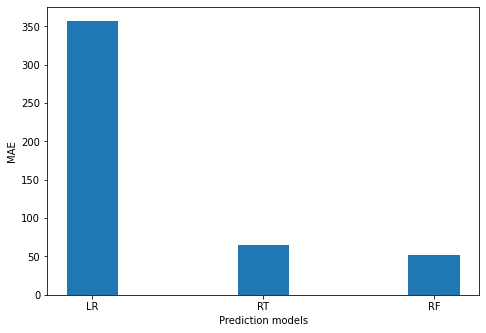

In [92]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
model = ['LR', 'RT', 'RF']
score = [MAE_LR, MAE_RT, MAE_RF]
ax.set_ylabel('MAE')
ax.set_xlabel('Prediction models')
ax.bar(model,score, 0.3)
plt.show()


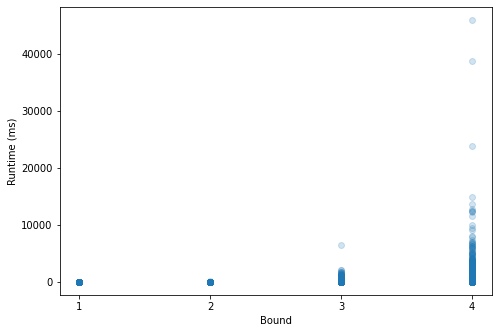

In [109]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
plt.xticks([1,2,3,4])
ax.set_ylabel('Runtime (ms)')
ax.set_xlabel('Bound')
ax.scatter(dataset['bound'], dataset['runtime'], alpha=0.2)
plt.show()